# The Value of a Used Car

1. The problem :

    Predicting the Value of a Used Vehicle.

2. Who might care:

    a. Individual Buyers : Whoever interested in buying a new car wonders about the actual value of the specific car with the one which was asked by the seller. So it is important for all to come to a better understanding of the values of the cars.

    b. Dealers : Most dealers would like to learn the value of that individual car, and determine its value later on.

    c. Individual Sellers : Most private sellers would need the value of their car since the value is not constant, it changes considering the depreciation, the repairs etc.

    d. Websites or Applications created to help private parties or dealers sell their vehicles.

    e. .....

3. Data  Set:

    a. Link of Data from Kaggle :   https://www.kaggle.com/orgesleka/used-cars-database/data
    
    b. Data Set includes 19 features and 371528 data points/observations. 

    c. The data seems raw. Has too many missing values, outliers. Also includes nonsense/ wrong entries like 9999 as year of Registration.

    d. This data includes the data points/observations from 2016. (I will search for methods to scrape data for 2017.)
    
    e. Target Feature is 'price'. Since it is the price of an individual car, it is continuous.


ML part 

(!!! 4. My approach to solve this problem:

    a. This seems to be a supervised problem.

    b. Regression, cause the dependent feature needs to be continous. However, I will combine cross-validation, GridSearch, Random Selection and etc.

    c. My dependent feature would be the value of the used cars.

    d. My independent features would be the 'name' of the car, seller type, horse power of the car, mileage, any damage or repair, gearbox (automatic or manuel), age of the car...

    e. I am thinking of dividing the data I have with 'train_test_split' feature of scikit learn. If I end up getting the data for 2017, then I would use the data from 2016 as my training data.)


5. What are your deliverables? Typically, this would include code, along with a paper. **

    I will complete this project on Jupiter Notebook. First I will examine data, then wrangle the data and apply ML algorithms. Hopefully I will have learned the basic concepts of data science (Wrangling, Story Telling (EDA) and ML)

    a. Data Collection

    b. Data Wrangling

    c. EDA (Exploratory Data Analysis)

    d. Modeling

    e. Presentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime 

%matplotlib inline

First Thing : Read your 'csv.file', explore your features.

In [2]:
df = pd.read_csv('/Users/ferideaxu/Downloads/used-cars-database/autos.csv', sep=',', header=0, index_col = 'dateCrawled', encoding = "ISO-8859-1")
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
dateCrawled,,,,,,,,,,,,,,,,,,,
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.columns

Index(['name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')

In [4]:
df.index = pd.to_datetime(df.index)
df['Age'] = df.index.year - df.yearOfRegistration
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Age
dateCrawled,,,,,,,,,,,,,,,,,,,,
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,23
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,5
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,12
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,15
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,8


Number of Duplicate Values (in terms of rows (meaning duplicate entry of a same car)): 29 

In [5]:
cols = ['name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']

for i,col in enumerate(cols):
    print(str(i+1)+'. Number of Unique Values for "',col.upper(), '" :', df[col].nunique(),' out of ->',df[col].count(),'\n')
    print(df[col].value_counts().sort_values(ascending=False).head(20),'\n')

1. Number of Unique Values for " NAME " : 233531  out of -> 371528 

Ford_Fiesta                          657
BMW_318i                             627
Opel_Corsa                           622
Volkswagen_Golf_1.4                  603
BMW_316i                             523
BMW_320i                             492
Volkswagen_Polo                      475
Renault_Twingo                       447
Volkswagen_Golf                      428
Volkswagen_Golf_1.6                  413
Volkswagen_Polo_1.2                  412
BMW_116i                             394
Opel_Corsa_1.2_16V                   373
Opel_Corsa_B                         369
Opel_Astra                           366
Peugeot_206                          365
Ford_Focus                           361
Opel_Corsa_1.0_12V                   344
Renault_Twingo_1.2                   322
Volkswagen_Passat_Variant_1.9_TDI    274
Name: name, dtype: int64 

2. Number of Unique Values for " SELLER " : 2  out of -> 371528 

privat        3715

Seller feature : 3 out of 371528 observations are dealer. So this feature can be dropped.

Offer Type feature : 12 out of 371528 observations are Gesuch. So this feature can be dropped.

Number of Pictures feature has all 0 values. So this feature can also be dropped.

PowerPS Feature : 40820 observations are 0. So this needs to be dealt with.


13 unique numbers for the 'kilometer' (mileage) exist. So we can keep them all since there is no outlier.

We can put month of Registration and year of Registration together. So we can have one feature rather than 2.

NotRepairedDamage feature has too many missing values.



7 features are discrete, numbers, whereas
13 features are object (string, datetime....)
Shape of the data is 371528x20
vehicleType, gearbox, model, fuelType, brand, notRepairedDamage columns have missing values

In [6]:
cols2 = df.columns
colsNew = [a for a in cols2 if a not in ['seller','offerType','nrOfPictures']]

for col in colsNew:
    print('No of Missing Values for Feature "', col.upper(),'" :',df[col].isnull().sum(),'\n')

No of Missing Values for Feature " NAME " : 0 

No of Missing Values for Feature " PRICE " : 0 

No of Missing Values for Feature " ABTEST " : 0 

No of Missing Values for Feature " VEHICLETYPE " : 37869 

No of Missing Values for Feature " YEAROFREGISTRATION " : 0 

No of Missing Values for Feature " GEARBOX " : 20209 

No of Missing Values for Feature " POWERPS " : 0 

No of Missing Values for Feature " MODEL " : 20484 

No of Missing Values for Feature " KILOMETER " : 0 

No of Missing Values for Feature " MONTHOFREGISTRATION " : 0 

No of Missing Values for Feature " FUELTYPE " : 33386 

No of Missing Values for Feature " BRAND " : 0 

No of Missing Values for Feature " NOTREPAIREDDAMAGE " : 72060 

No of Missing Values for Feature " DATECREATED " : 0 

No of Missing Values for Feature " POSTALCODE " : 0 

No of Missing Values for Feature " LASTSEEN " : 0 

No of Missing Values for Feature " AGE " : 0 



In [7]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,Age
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764,11.422003
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247,92.866598
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000,-7983.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000,8.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000,13.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000,17.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000,1016.000000


** As we can easily see, some nonsense data points exist 'such as' yearofRegistrain '1000', and '9999', also exist some outliers. So Data wrangling is important before applying models on the data.

In [8]:
df.describe(include=['object'])

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,233531,2,2,2,8,2,251,7,40,2,114,182806
top,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


As easily can be seen from the table, 2 unique values exist for 'seller, offerType, abtest, gearbox, notRepairedDamage', 8 unique values for 'vehicleType', 7 unique values for 'fuelType', 40 unique values for 'model'. Integer and DateTime features includes many different/unique data points.

----DROP THE UNNECESSARY FEATURES/COLUMNS-----

In [9]:
df = df.drop(['seller','offerType','nrOfPictures'], axis=1)

Let's Wrangle the Data.

* Delete the duplicates.
* Get rid of the null/missing values
* Clean the outliers.

----- >>>>>>>>>>Delete the duplicates !!!

In [10]:
print(df.duplicated().sum())
df = df.drop_duplicates()

29


-------->>>>>>> Get rid of the null/missing values !!!

In [11]:
df = df.replace(['nein','ja','benzin','andere','elektro','manuell','automatik','kleinwagen','kombi'],[0,1,'gas','other','electric','manual','automatic','smallCar','stationWagon'])
df.fuelType.unique()

array(['gas', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng', 'electric'], dtype=object)

In [12]:
df.fuelType.value_counts()

gas         223841
diesel      107737
lpg           5377
cng            571
hybrid         278
other          208
electric       104
Name: fuelType, dtype: int64

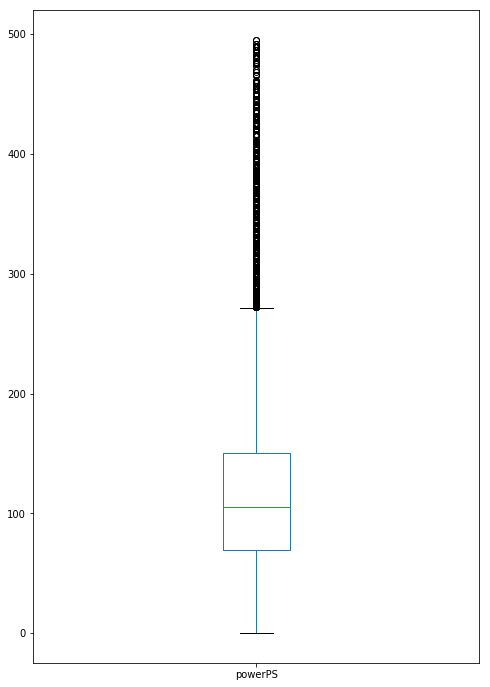

In [13]:
plt.subplots(figsize=(8,12))
df.powerPS[df.powerPS < 500].plot(kind='box')

In [14]:
df[df.powerPS > 600].head(20)
(df.powerPS > 600).sum()
(df.powerPS < 1).sum()

df[(df.powerPS < 10) & (df.powerPS > 0)].head(10)

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
dateCrawled,,,,,,,,,,,,,,,,,
2016-03-20 20:45:27,Microcar_MC1,3950,test,smallCar,2004,automatic,5,NaN,70000,5,diesel,sonstige_autos,0.0,2016-03-20 00:00:00,90562,2016-04-03 04:17:08,12
2016-03-29 17:37:58,VW_polo__TDI,1990,control,smallCar,2004,NaN,7,polo,150000,5,diesel,volkswagen,0.0,2016-03-29 00:00:00,37124,2016-04-02 05:16:40,12
2016-04-04 07:58:34,Audi_A4_2009,9000,test,limousine,2009,manual,2,a4,5000,12,diesel,audi,NaN,2016-04-04 00:00:00,12045,2016-04-06 10:17:01,7
2016-03-24 16:38:53,Microcar_Virgo_3,2850,control,smallCar,2005,automatic,5,NaN,40000,8,diesel,sonstige_autos,0.0,2016-03-24 00:00:00,56825,2016-04-07 08:44:59,11
2016-04-02 22:47:03,Microcar_MC2,2500,test,smallCar,2006,automatic,5,NaN,40000,1,diesel,sonstige_autos,1.0,2016-04-02 00:00:00,78532,2016-04-04 21:17:01,10
2016-03-08 17:56:37,Elektroauto_City_EL,4500,control,other,2006,automatic,5,NaN,40000,7,electric,sonstige_autos,0.0,2016-03-08 00:00:00,77855,2016-04-07 08:46:28,10
2016-03-26 10:48:50,AIXAM__MEGA_Multitruck,4600,test,other,2012,manual,4,NaN,20000,9,diesel,sonstige_autos,0.0,2016-03-26 00:00:00,40822,2016-03-26 10:48:50,4
2016-03-17 22:48:49,Klima_Aus_2Te_Hand_Winter+Sommerreifen_Auf_Alu...,4999,test,limousine,2003,manual,1,e_klasse,150000,12,diesel,mercedes_benz,NaN,2016-03-17 00:00:00,66571,2016-03-17 23:44:50,13
2016-03-28 14:56:39,Aixam_400_SL,5200,test,smallCar,1998,automatic,5,NaN,40000,9,diesel,sonstige_autos,NaN,2016-03-28 00:00:00,84085,2016-04-04 18:15:43,18


#### Cars which have higher HP than 600 and lower HP than 5 should be added to the website by mistake. So this feature should be filtered.

Number of Cars with newer entries than 2016 : 14680
Number of Cars with older entries than 1970 : 1738


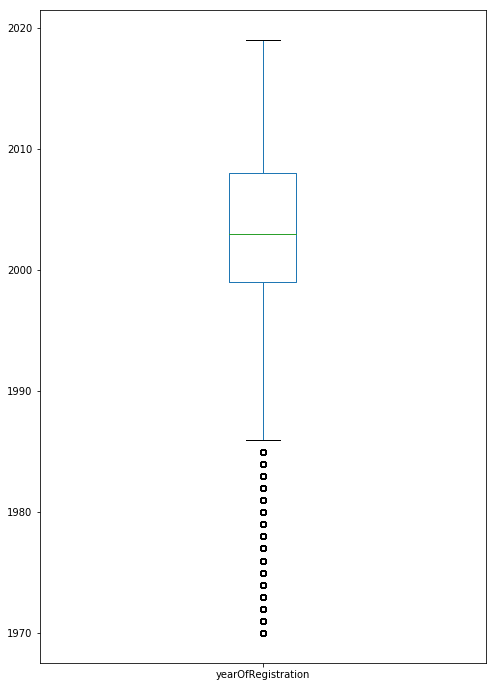

In [15]:
plt.subplots(figsize=(8,12))
df.yearOfRegistration[(df.yearOfRegistration <= 2020) & (df.yearOfRegistration >= 1970)].plot(kind='box')
print('Number of Cars with newer entries than 2016 :',(df.yearOfRegistration > 2016).sum())
print('Number of Cars with older entries than 1970 :',(df.yearOfRegistration < 1970).sum())

### Cars with a registration date newer than 2016 and older than 1970 could be deleted. There are only 1739 old cars and 14680 cars with a wrong new entry.

In [16]:
print('Number of Cars with a Value higher than 100.000 :',(df.price > 100000).sum())
print('Number of Cars with a Value lower than 250 and equal to 0 :', (df.price < 250).sum(),'and', (df.price == 0).sum())

Number of Cars with a Value higher than 100.000 : 403
Number of Cars with a Value lower than 250 and equal to 0 : 19998 and 10777


### There are 10778 cars with a Value of '0'. So we can assume that these cars are free of charge as a gift, or a wrong entry. This number is high. Should be resolved.

#### There are 403 cars with a value of higher than $100.000. This number is low enough to be underestimated.

# CLEAN THE OUTLIERS!!!!

In [17]:
yearsBool = ((df.yearOfRegistration <= 2016) & (df.yearOfRegistration >= 1970))

priceBool = (df.price <= 100000)

powerBool = ((df.powerPS <= 600) & (df.powerPS >= 5))

dfNoOutlier = df[yearsBool & priceBool & powerBool]

In [18]:
print('Data for Analysis : {}'.format(100 * (dfNoOutlier.shape[0] / df.shape[0])))

Data for Analysis : 85.5714281868861


## GET RID OF NULL/MISSING VALUES ??? WHAT STRATEGY SHOULD I FOLLOW????

In [19]:
dfNoOutlier.isnull().sum()

name                       0
price                      0
abtest                     0
vehicleType            12091
yearOfRegistration         0
gearbox                 5808
powerPS                    0
model                  12217
kilometer                  0
monthOfRegistration        0
fuelType               16870
brand                      0
notRepairedDamage      45715
dateCreated                0
postalCode                 0
lastSeen                   0
Age                        0
dtype: int64

In [20]:
dfout=dfNoOutlier

# Explaratory Data Analysis - Visualization

In [21]:
dfout.describe(include='all')

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
count,317897,317897.000000,317897,305806,317897.000000,312089,317897.000000,305680,317897.000000,317897.000000,301027,317897,272182.000000,317897,317897.000000,317897,317897.000000
unique,194815,NaN,2,8,NaN,2,NaN,250,NaN,NaN,7,40,NaN,110,NaN,160446,NaN
top,BMW_318i,NaN,test,limousine,NaN,manual,NaN,golf,NaN,NaN,gas,volkswagen,NaN,2016-04-03 00:00:00,NaN,2016-04-06 04:17:20,NaN
freq,621,NaN,164706,88703,NaN,242073,NaN,26173,NaN,NaN,197588,68112,NaN,12564,NaN,16,NaN
mean,NaN,6021.349695,NaN,NaN,2003.215913,NaN,126.066320,NaN,125685.567967,5.980550,NaN,NaN,0.112013,NaN,51437.370412,NaN,12.784087
std,NaN,7641.440531,NaN,NaN,6.468564,NaN,61.028463,NaN,39199.138454,3.588609,NaN,NaN,0.315383,NaN,25819.652517,NaN,6.468564
min,NaN,0.000000,NaN,NaN,1970.000000,NaN,5.000000,NaN,5000.000000,0.000000,NaN,NaN,0.000000,NaN,1067.000000,NaN,0.000000
25%,NaN,1300.000000,NaN,NaN,1999.000000,NaN,80.000000,NaN,100000.000000,3.000000,NaN,NaN,0.000000,NaN,31061.000000,NaN,8.000000
50%,NaN,3350.000000,NaN,NaN,2003.000000,NaN,116.000000,NaN,150000.000000,6.000000,NaN,NaN,0.000000,NaN,50667.000000,NaN,13.000000
75%,NaN,7900.000000,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,0.000000,NaN,72348.000000,NaN,17.000000


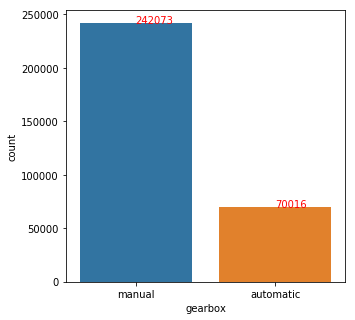

In [22]:
plt.subplots(figsize=(5,5))
ax = sns.countplot(x='gearbox',data=dfout)

for i, v in dfout.gearbox.value_counts().reset_index().iterrows():
    ax.text(i,v.gearbox,v.gearbox,color='red',fontsize=10)

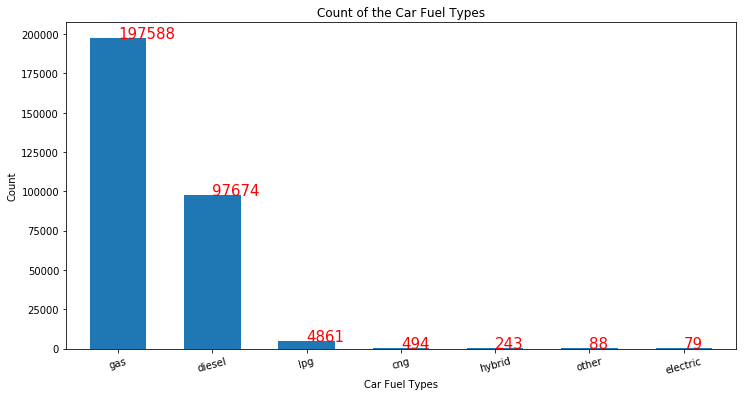

In [23]:
plt.subplots(figsize=[12,6])
ax=dfout.fuelType.value_counts().plot.bar(width=0.6)
#sns.countplot(x='fuelType',data=dfout)
plt.xticks(rotation=15)

for i, v in dfout.fuelType.value_counts().reset_index().iterrows():
    ax.text(i,v.fuelType,v.fuelType,color='red',fontsize=15)
    
plt.xlabel('Car Fuel Types')
plt.ylabel('Count')
plt.title('Count of the Car Fuel Types')
plt.show()

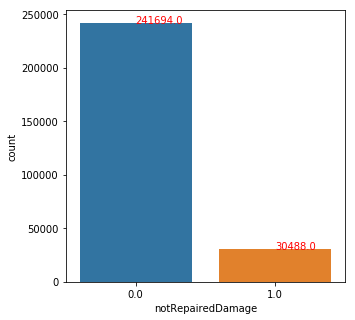

In [24]:
plt.subplots(figsize=(5,5))
ax=sns.countplot(x='notRepairedDamage',data=dfout)

for i, v in dfout.notRepairedDamage.value_counts().reset_index().iterrows():
    ax.text(i,v.notRepairedDamage,v.notRepairedDamage,color='red',fontsize=10)

We can drop 'seller' since almost 100% percent of 'seller' is private

In [25]:
dfout.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
dateCrawled,,,,,,,,,,,,,,,,,
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,1.0,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,5
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,12
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,smallCar,2001,manual,75,golf,150000,6,gas,volkswagen,0.0,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,15
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallCar,2008,manual,69,fabia,90000,7,diesel,skoda,0.0,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manual,102,3er,150000,10,gas,bmw,1.0,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,21


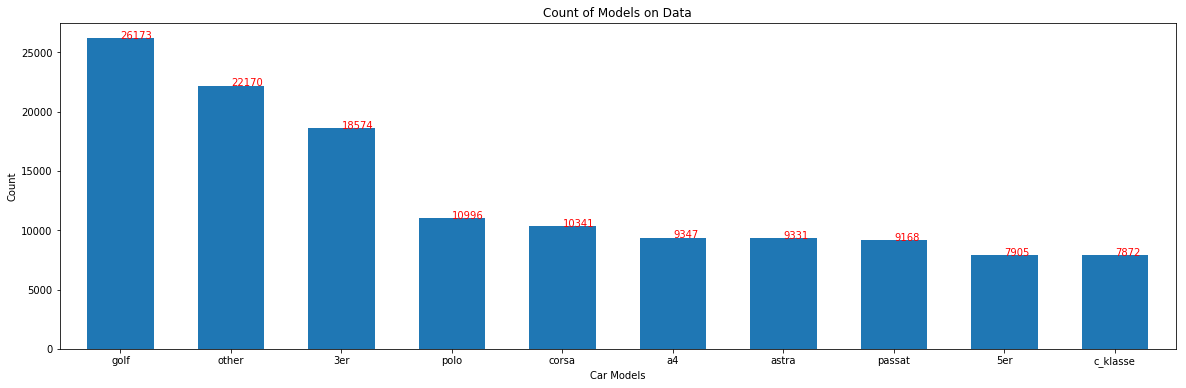

In [26]:
plt.subplots(figsize=[20,6])

ax=dfout.model.value_counts().head(10).plot.bar(width=0.6)

for i, v in dfout.model.value_counts().head(10).reset_index().iterrows():
    ax.text(i, v.model, v.model, color='red')

plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Car Models')
plt.ylabel('Count')
plt.title('Count of Models on Data')
plt.show()

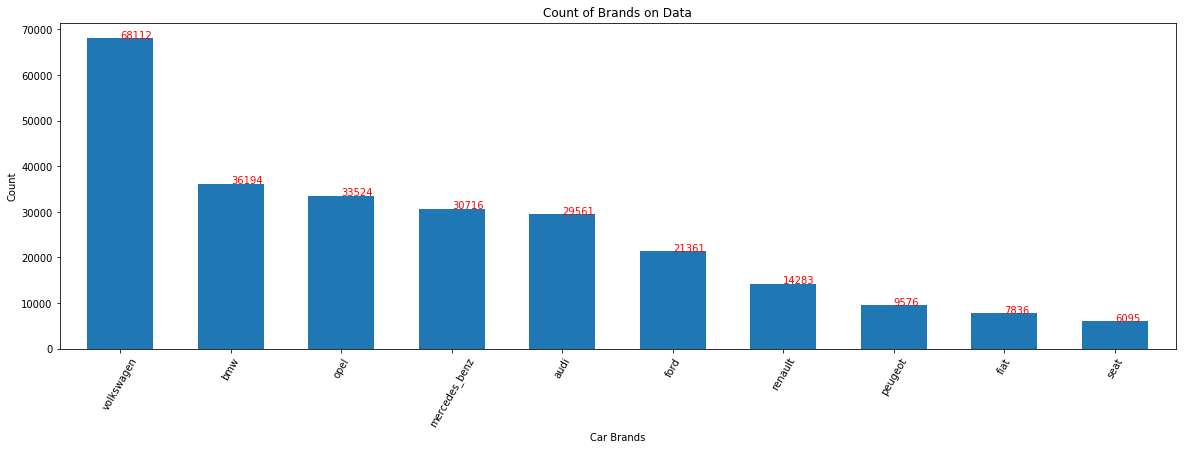

In [27]:
plt.subplots(figsize=[20,6])
ax = dfout.brand.value_counts().head(10).plot.bar(width=0.6)

for i, v in dfout.brand.value_counts().head(10).reset_index().iterrows():
    ax.text(i, v.brand, v.brand, color='red')

plt.xticks(rotation=60) # rotate ticks
plt.xlabel('Car Brands')
plt.ylabel('Count')
plt.title('Count of Brands on Data')
plt.show()

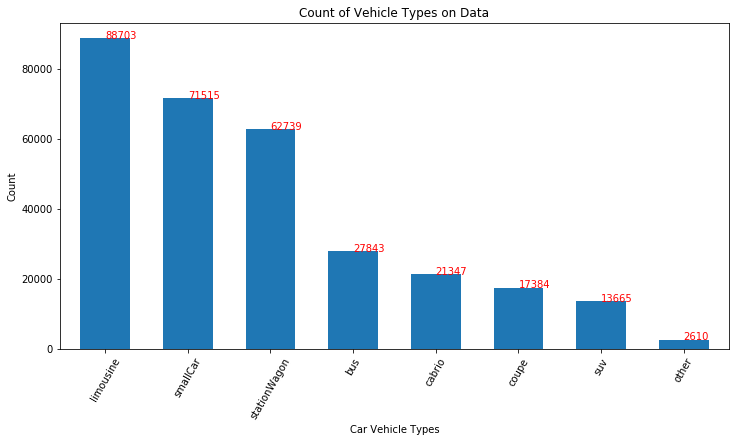

In [28]:
plt.subplots(figsize=[12,6])
ax = dfout.vehicleType.value_counts().plot.bar(width=0.6)
plt.xticks(rotation=15)

for i, v in dfout.vehicleType.value_counts().reset_index().iterrows():
    ax.text(i, v.vehicleType, v.vehicleType, color='red')

plt.xticks(rotation=60) # rotate ticks
plt.xlabel('Car Vehicle Types')
plt.ylabel('Count')
plt.title('Count of Vehicle Types on Data')
plt.show()

## Multivariate Visualisations...

### Visualisations of price by brand

Volkswagen, BMW and Opel are the 3 most posted brands.

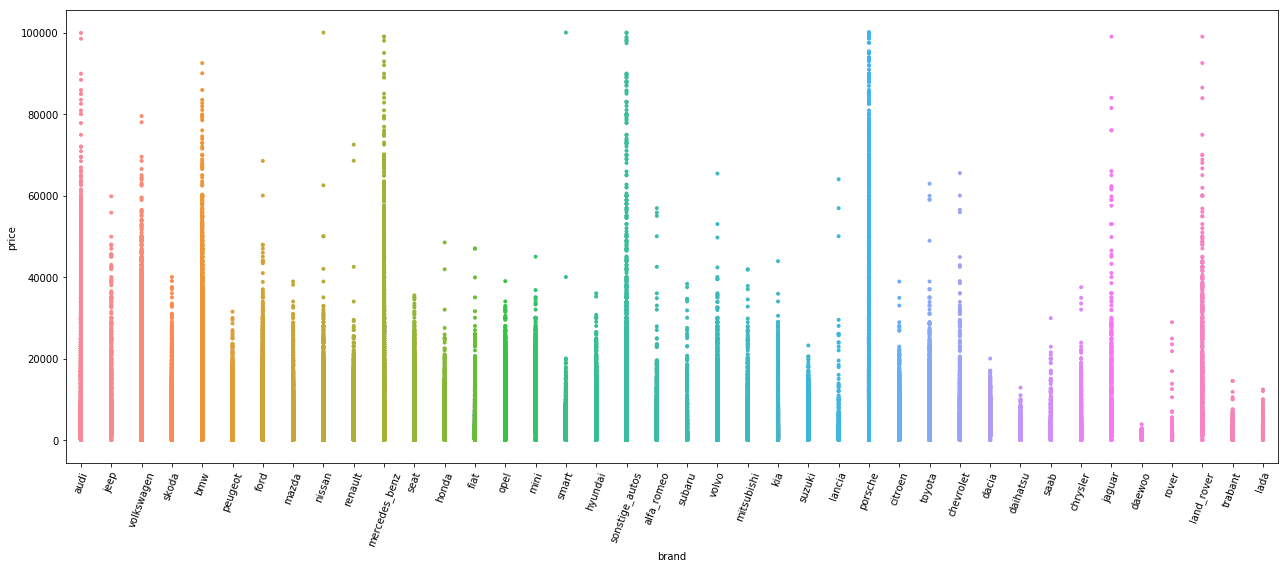

In [29]:

plt.subplots(figsize=[18,8])
sns.stripplot(x='brand',y='price',data=dfout, size=4)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Visualsations of price by fuelType

Gas and Diesel are the 2 major ones in terms of price and count.

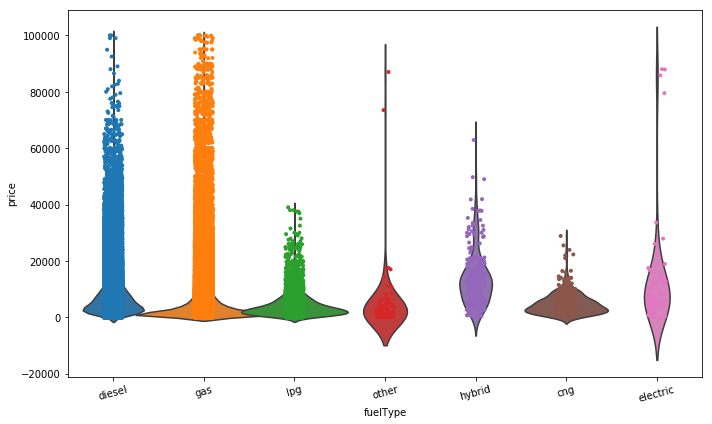

In [30]:
plt.subplots(figsize=[10,6])
sns.violinplot(x='fuelType',y='price',data=dfout,inner=None,width=1.5)
sns.stripplot(x='fuelType',y='price',data=dfout, size=4, jitter=True)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### The visualisations of prices by gearbox...

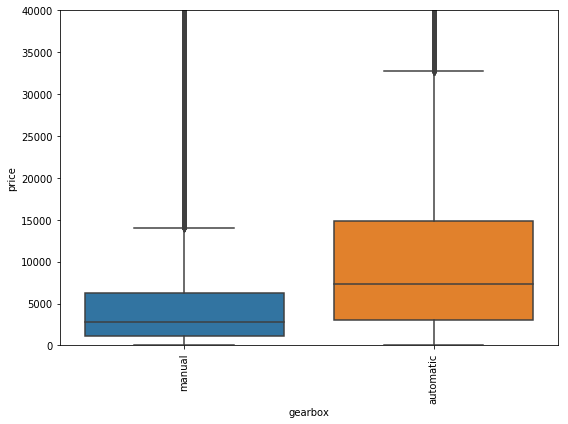

In [31]:
plt.subplots(figsize=(8,6))
sns.boxplot(x='gearbox',y='price',data=dfout)
plt.xticks(rotation=90)
plt.ylim(0,40000)
plt.tight_layout()
plt.show()

### It is hard to tell what this AB testing is for.

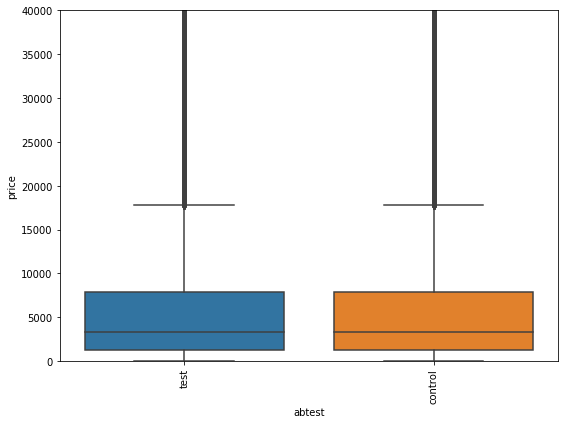

In [32]:
plt.subplots(figsize=(8,6))
sns.boxplot(x='abtest',y='price',data=dfout)
plt.xticks(rotation=90)
plt.ylim(0,40000)
plt.tight_layout()
plt.show()

### Lets look at the relation between the mileage and the price.

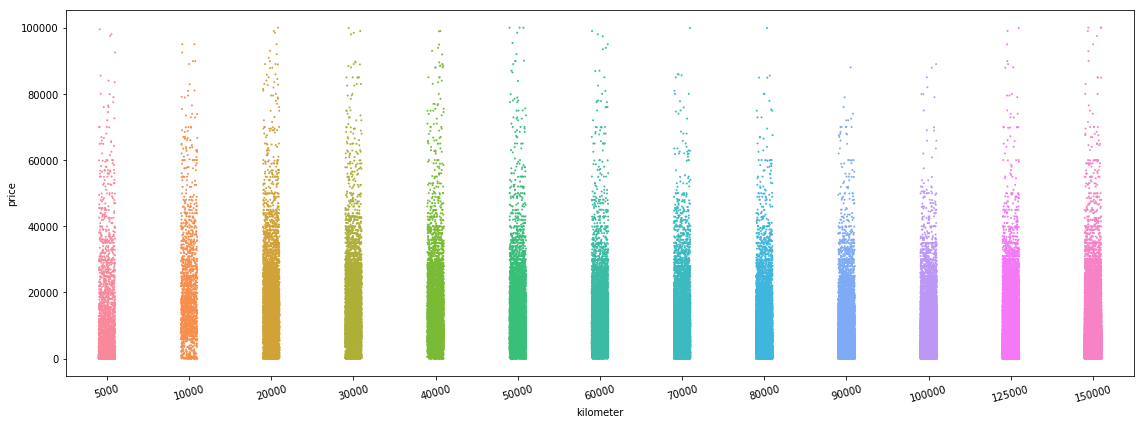

In [48]:
plt.subplots(figsize=[16,6])
#sns.violinplot(x='kilometer',y='price',data=dfout,inner=None,width=1.5)
sns.stripplot(x='kilometer',y='price',data=dfout, size=2, jitter=True)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Visualisation of price by Age

Prices of the cars go down by age. However, some old cars have a high value. I think these cars are classic cars.

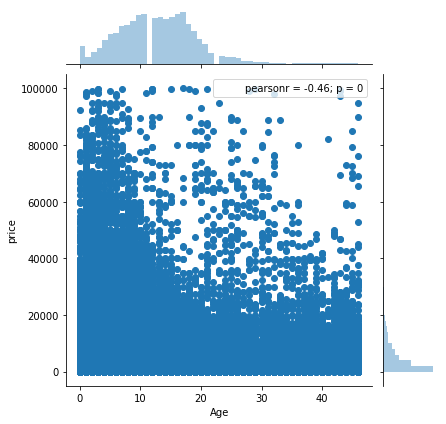

In [33]:
sns.jointplot(x='Age',y='price',data=dfout)

### Correlation Map

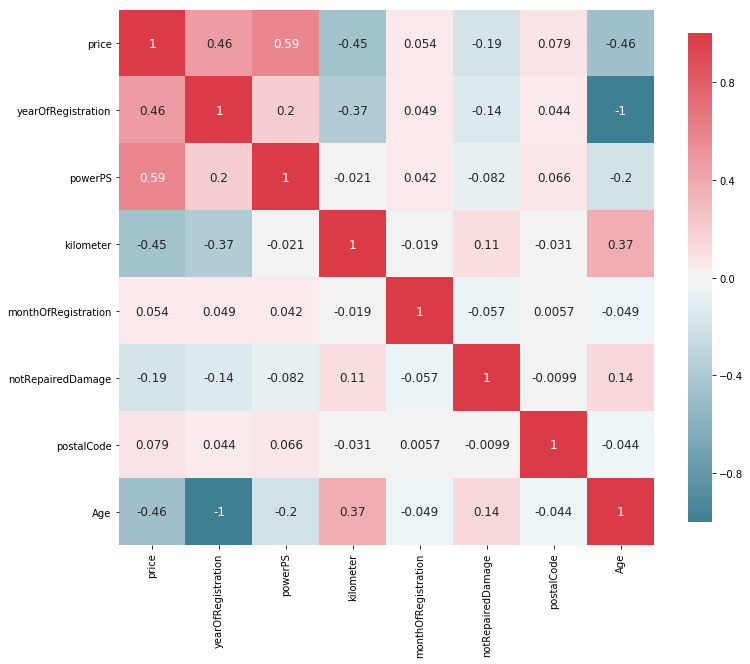

In [34]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(dfout)